In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

# 20191202 dataset

In [3]:
file=f'{bigDir}\\20191202_new dataset\\signals_new_v6_random_2.csv'
data=pd.read_csv(file)

In [4]:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1'])

In [5]:
data.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,20191203_cell-00.czi,20191125-01-17,191125pcnat_dhbr_cdc6vxy01,678.301,200.931,MCM3,1,HP1beta,2,3,...,0.444,1.415176e+09,425500564.0,9.896759e+08,550518042.0,321679433.0,228838609.0,8.646584e+08,103821131.0,7.608373e+08
1,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,HP1beta,2,3,...,1.373,2.175016e+09,804184935.0,1.370831e+09,896267478.0,567124747.0,329142731.0,1.278748e+09,237060188.0,1.041688e+09
2,20191203_cell-02.czi,20191125-01-23,191125pcnat_dhbr_cdc6vxy01,1131.436,318.530,MCM3,1,HP1beta,2,3,...,1.371,1.933001e+09,666820604.0,1.266180e+09,732487366.0,444813519.0,287673847.0,1.200514e+09,222007085.0,9.785064e+08
3,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,HP1beta,2,3,...,0.208,1.062142e+09,233589820.0,8.285525e+08,403943621.0,187675893.0,216267728.0,6.581987e+08,45913927.0,6.122848e+08
4,20191203_cell-04.czi,20191125-01-32,191125pcnat_dhbr_cdc6vxy01,1466.687,426.815,MCM3,1,HP1beta,2,3,...,0.345,1.717888e+09,546330833.0,1.171557e+09,697150763.0,424718652.0,272432111.0,1.020738e+09,121612181.0,8.991254e+08


<IPython.core.display.Javascript object>


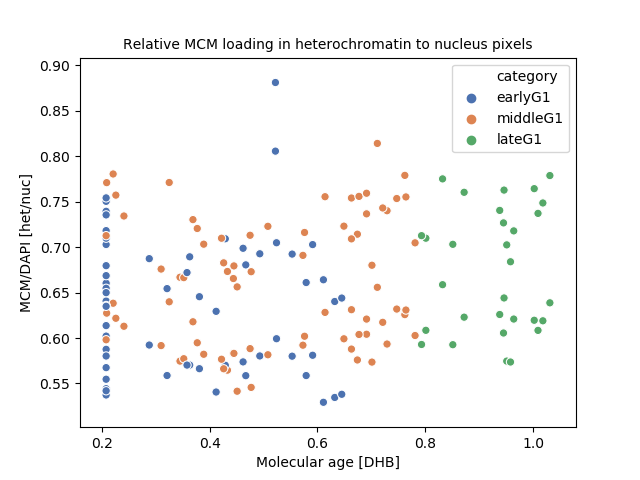

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [6]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


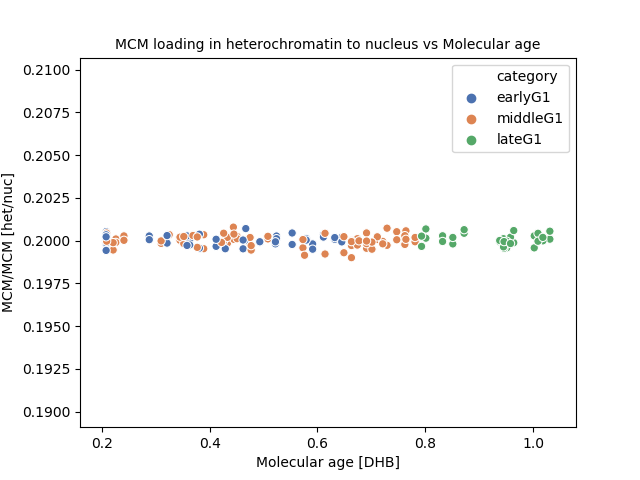

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [7]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

# 200217 dataset

In [36]:
file1=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v9_random_20.csv'
data1=pd.read_csv(file1)

In [37]:
data1=data1.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1'])

In [38]:
data1.head()

,file,original cell name,movie,x,y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,20200217_cell_00.ciz,2020024-19-21-63X.czi,20200217pinducer gemininxy19,1312.741,235.893,MCM3,1,HP1,2,3,...,0.948,2.693842e+09,9.314778e+08,1.762364e+09,1.339535e+09,8.299883e+08,509546448.0,1.354307e+09,101489496.0,1.252817e+09
1,20200217_cell_01.ciz,2020024-19-27-63X.czi,20200217pinducer gemininxy19,1323.444,397.761,MCM3,1,HP1,2,3,...,0.465,2.172380e+09,8.241901e+08,1.348189e+09,9.915096e+08,6.602304e+08,331279227.0,1.180870e+09,163959707.0,1.016910e+09
2,20200217_cell_02.ciz,2020024-19-39-63X.czi,20200217pinducer gemininxy19,1772.297,584.995,MCM3,1,HP1,2,3,...,2.001,3.263571e+09,1.319735e+09,1.943836e+09,1.458153e+09,1.100649e+09,357504422.0,1.805418e+09,219086613.0,1.586331e+09
3,20200217_cell_03.ciz,2020024-19-49-63X.czi,20200217pinducer gemininxy19,163.044,727.256,MCM3,1,HP1,2,3,...,1.063,2.334174e+09,9.963424e+08,1.337832e+09,1.103680e+09,8.515261e+08,252154253.0,1.230494e+09,144816240.0,1.085678e+09
4,20200217_cell_04.ciz,2020024-19-51-63X.czi,20200217pinducer gemininxy19,1791.955,755.367,MCM3,1,HP1,2,3,...,0.579,2.112534e+09,6.756199e+08,1.436915e+09,9.837290e+08,5.828320e+08,400897040.0,1.128805e+09,92787952.0,1.036018e+09


In [39]:
data1=data1.loc[data1.group == 'CTL',:]

<IPython.core.display.Javascript object>


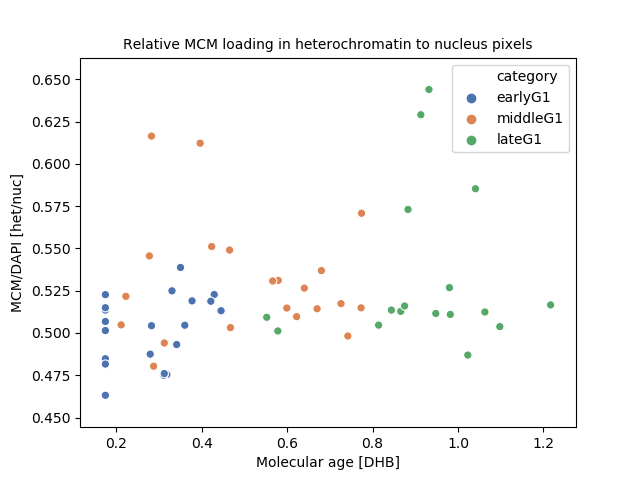

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [40]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

<IPython.core.display.Javascript object>


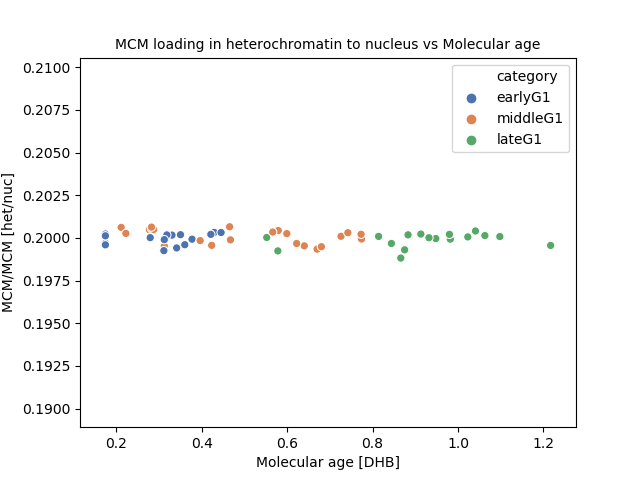

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [42]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

# 200203 dataset

In [46]:
file2=f'{bigDir}\\20200203_new data\\cellinfo_200203_v11_random_20.csv'
data2=pd.read_csv(file2)

data2=data2.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

data2=data2.loc[data2.group=='siLuc']

In [57]:
data2.loc[(['middel G1' in x for x in data2.category]), 'category']='middleG1'

In [47]:
data2.group.unique()

array(['siLuc'], dtype=object)

In [58]:
data2.loc[(['G1' in x for x in data2.category]), :].category.unique()

array(['earlyG1', 'middleG1', 'lateG1'], dtype=object)

<IPython.core.display.Javascript object>


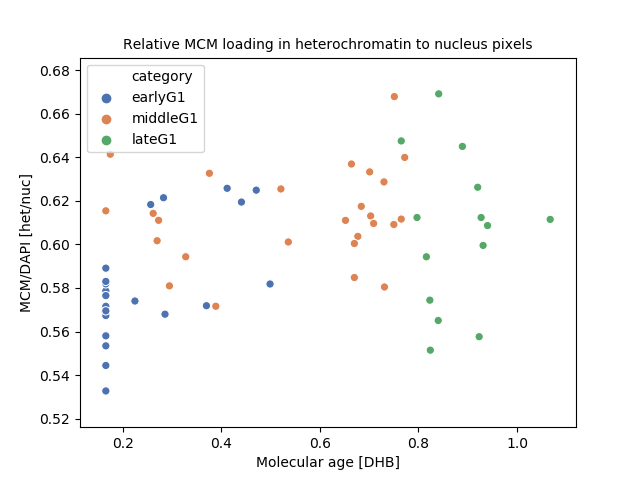

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [60]:
%matplotlib notebook
data2['temp']=(data2.nuc_mcm_het/data2.nuc_DAPI_het)/(data2.nuc_mcm_total/data2.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data2.loc[(['G1' in x for x in data2.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)

<IPython.core.display.Javascript object>


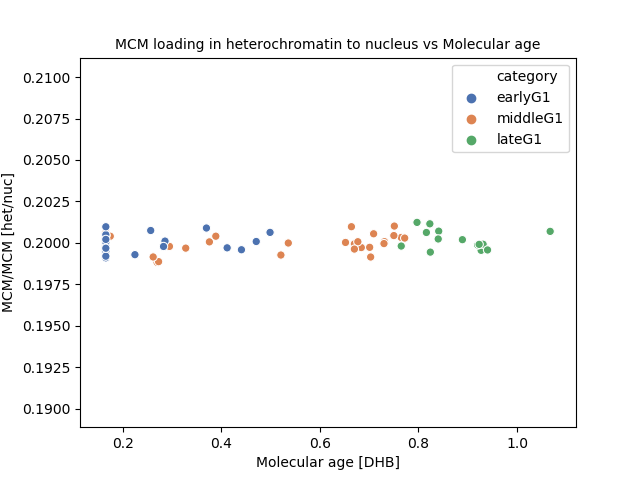

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [61]:
%matplotlib notebook
data2['temp']=(data2.nuc_mcm_het/data2.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data2.loc[(['G1' in x for x in data2.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)